<a href="https://colab.research.google.com/github/Freddyx94/UE/blob/main/Encoding_Decoding_with_ML_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Colab Tutorial: Encoding/Decoding + ML Prediction Analysis (with Visualisations)

Dataset: **Iris (built-in scikit-learn)** ✅

You will learn:
1) Load built-in data
2) Basic cleaning
3) Visualisation
4) Encoding + decoding
5) Train ML algorithms
6) **Prediction analysis** (confusion matrix, classification report, ROC (OvR))
7) Model comparison + feature importance visualisation


## 1) Setup

In [1]:

import numpy as np #Do Math
import pandas as pd #Working with DF/Tables
import matplotlib.pyplot as plt #Data Visualisations

from sklearn.datasets import load_iris #Give me flower Data


## 2) Load inbuilt dataset (Iris)

In [2]:

iris = load_iris() #Creating a variable for the iris dataset

df = pd.DataFrame(iris.data, columns=iris.feature_names) #Put that data into table
df["target"] = iris.target #Target Column - Predict which flower it is
# 0,1,2 -> Setosa, Virginica, Versicolor {0:Setosa, 2:Virigica, 1:Versicolor}
# Decode numeric target to names
df["species"] = df["target"].map(dict(enumerate(iris.target_names)))

df.head(10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


## 3) Basic cleaning (beginner-friendly)
- Check missing values
- Rename columns (simpler)


In [3]:

print("Missing values per column:") #Checking for missing values
print(df.isna().sum()) #All the sum of the MS -> Missing Values

df = df.rename(columns={
    "sepal length (cm)": "sepal_length",
    "sepal width (cm)": "sepal_width",
    "petal length (cm)": "petal_length",
    "petal width (cm)": "petal_width",
})

df.tail()


Missing values per column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64


,sepal_length,sepal_width,petal_length,petal_width,target,species
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


## 4) Simple visualisations
### 4.1 Scatter plot

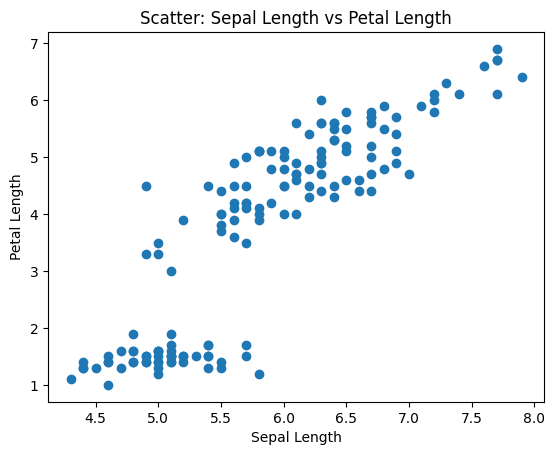

In [4]:

plt.figure()
plt.scatter(df["sepal_length"], df["petal_length"])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Scatter: Sepal Length vs Petal Length")
plt.show()


### 4.2 Class-wise scatter plot (colored by species)
We’ll draw one plot per species (simple to understand).

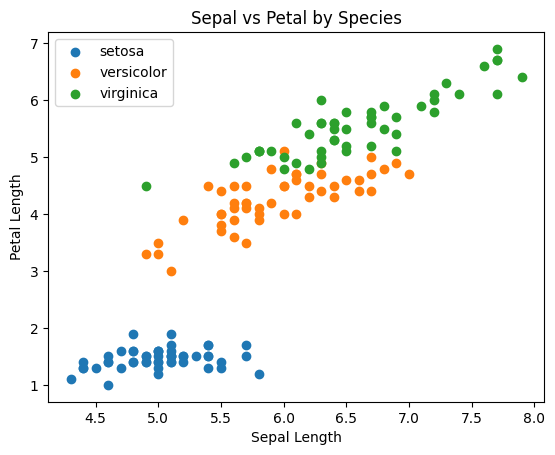

In [5]:

plt.figure()
for name in df["species"].unique():
    tmp = df[df["species"] == name]
    plt.scatter(tmp["sepal_length"], tmp["petal_length"], label=name)
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Sepal vs Petal by Species")
plt.legend()
plt.show()


# 5) Encoding & Decoding Techniques
We will encode the **species** column.

Why encode? Many ML algorithms need numeric inputs.


## 5.1 Label Encoding + Decode back

In [6]:
#Setosa -> 0
#Versicolor -> 1
#Virginica -> 2
from sklearn.preprocessing import LabelEncoder #Encodes the data

le = LabelEncoder() #LE
df["species_label"] = le.fit_transform(df["species"]) #Names -> Numbers

df[["species", "species_label"]].tail()


,species,species_label
145,virginica,2
146,virginica,2
147,virginica,2
148,virginica,2
149,virginica,2


In [7]:

# Decode back (example)
le.inverse_transform(df["species_label"].tail())


array([np.str_('virginica'), np.str_('virginica'), np.str_('virginica'),
       np.str_('virginica'), np.str_('virginica')], dtype=object)

## 5.2 One-Hot Encoding + Decode back

In [8]:

from sklearn.preprocessing import OneHotEncoder #Encode using the pattern of 1-0-0

ohe = OneHotEncoder(sparse_output=False)
species_onehot = ohe.fit_transform(df[["species"]])

ohe_df = pd.DataFrame(species_onehot, columns=ohe.get_feature_names_out(["species"]))
ohe_df.tail()


,species_setosa,species_versicolor,species_virginica
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0
149,0.0,0.0,1.0


In [9]:

# Decode back (example)
ohe.inverse_transform(species_onehot[:5]).ravel()


array([np.str_('setosa'), np.str_('setosa'), np.str_('setosa'),
       np.str_('setosa'), np.str_('setosa')], dtype=object)

## 5.3 Pandas get_dummies (quickest)

In [10]:

pd.get_dummies(df["species"]).tail()


,setosa,versicolor,virginica
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True
149,False,False,True


## 5.4 Ordinal Encoding (demo only)
⚠ Use ordinal encoding when categories have a real order.
Iris species are NOT ordered, so this is just for demonstration.

In [11]:

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["species_ordinal"] = ord_enc.fit_transform(df[["species"]])

df[["species", "species_ordinal"]].head()


,species,species_ordinal
0,setosa,0.0
1,setosa,0.0
2,setosa,0.0
3,setosa,0.0
4,setosa,0.0


In [12]:

# Decode back (example)
ord_enc.inverse_transform(df[["species_ordinal"]].head()).ravel()


array([np.str_('setosa'), np.str_('setosa'), np.str_('setosa'),
       np.str_('setosa'), np.str_('setosa')], dtype=object)

# 6) ML Prediction: Train models + Prediction analysis
We will predict species based on the 4 numeric features.

Steps:
1) Split train/test
2) Train multiple ML algorithms
3) Evaluate (accuracy + confusion matrix + classification report)
4) Visualise results


## 6.1 Prepare X and y

In [13]:

from sklearn.model_selection import train_test_split

X = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = df["species_label"]  # encoded labels

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y #Flattens your numbers
)

X_train.shape, X_test.shape


((105, 4), (45, 4))

## 6.2 Train multiple ML algorithms (simple set)
We’ll compare:
- Logistic Regression
- KNN
- Decision Tree
- Random Forest

Then we’ll compare accuracy in a plot.

In [14]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models = {
    "LogisticRegression": LogisticRegression(max_iter=300),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42, n_estimators=200),
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    results.append((name, acc))

results_df = pd.DataFrame(results, columns=["model", "accuracy"]).sort_values("accuracy", ascending=False)
results_df


,model,accuracy
1,KNN,0.977778
0,LogisticRegression,0.933333
2,DecisionTree,0.933333
3,RandomForest,0.911111


### Accuracy comparison plot

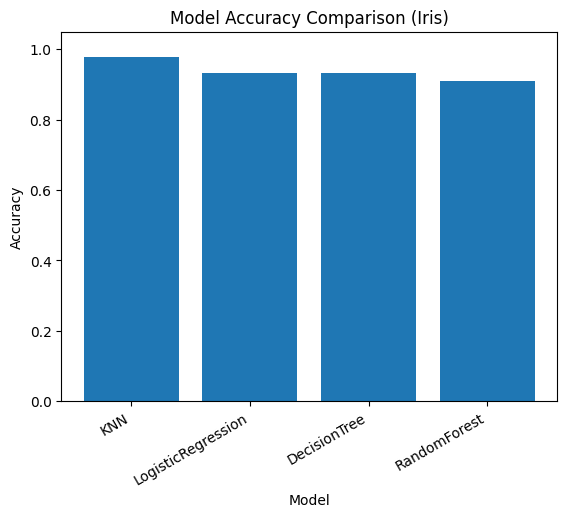

In [15]:

plt.figure()
plt.bar(results_df["model"], results_df["accuracy"])
plt.ylim(0, 1.05)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison (Iris)")
plt.xticks(rotation=30, ha="right")
plt.show()


## 6.3 Pick the best model and do deeper analysis
We’ll select the highest accuracy model automatically.

In [16]:

best_model_name = results_df.iloc[0]["model"]
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

best_model_name


'KNN'

### Confusion Matrix (visual)
This shows where the model is getting correct/incorrect predictions.

<Figure size 640x480 with 0 Axes>

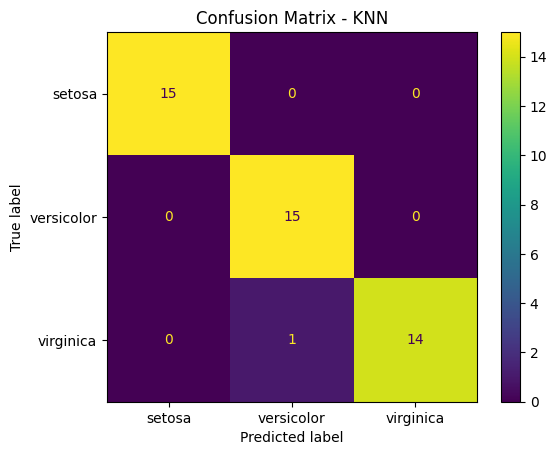

In [17]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()


### Classification Report
Precision / Recall / F1 for each class.

In [18]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=le.classes_, digits=3))


              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        15
  versicolor      0.938     1.000     0.968        15
   virginica      1.000     0.933     0.966        15

    accuracy                          0.978        45
   macro avg      0.979     0.978     0.978        45
weighted avg      0.979     0.978     0.978        45



## 6.4 ROC Curve (Multi-class using One-vs-Rest)
ROC is normally for binary classification.
For multi-class, we can use One-vs-Rest (OvR).

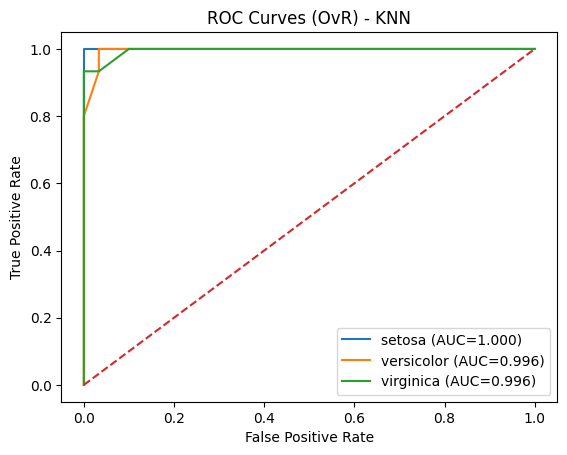

In [19]:

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

# Binarize true labels for OvR
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Wrap model for probability estimates if needed
# Some models have predict_proba; OvR handles multi-class ROC
ovr = OneVsRestClassifier(best_model)
ovr.fit(X_train, y_train)

# Get probabilities (fallback to decision_function if not available)
if hasattr(ovr, "predict_proba"):
    y_score = ovr.predict_proba(X_test)
else:
    y_score = ovr.decision_function(X_test)

plt.figure()
for i, class_name in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_name} (AUC={roc_auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curves (OvR) - {best_model_name}")
plt.legend()
plt.show()


# 7) Feature importance / influence visualisation
Depending on the model:
- RandomForest/DecisionTree → `feature_importances_`
- LogisticRegression → `coef_` (weights)


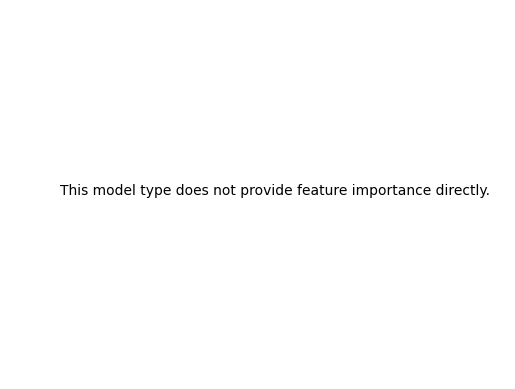

In [20]:

feature_names = X.columns.tolist()

plt.figure()
if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
    plt.bar(feature_names, importances)
    plt.title(f"Feature Importance - {best_model_name}")
    plt.xticks(rotation=30, ha="right")
    plt.ylabel("Importance")
elif hasattr(best_model, "coef_"):
    # For multi-class logistic regression: average absolute weights
    importances = np.mean(np.abs(best_model.coef_), axis=0)
    plt.bar(feature_names, importances)
    plt.title(f"Average |Coefficient| - {best_model_name}")
    plt.xticks(rotation=30, ha="right")
    plt.ylabel("Avg |coef|")
else:
    plt.text(0.1, 0.5, "This model type does not provide feature importance directly.")
    plt.axis("off")

plt.show()


# 8) Predict on new input (simple demo)
You can enter your own flower measurements and predict the species.

In [21]:

# Example new flower (sepal_length, sepal_width, petal_length, petal_width)
new_sample = pd.DataFrame([[2.1, 1.5, 5.4, 3.2]], columns=X.columns)

pred_label = best_model.predict(new_sample)[0]
pred_name = le.inverse_transform([pred_label])[0]

pred_name


np.str_('virginica')

# ✅ Final Summary
- Used **built-in Iris dataset** (Colab friendly)
- Simple cleaning + visualisation
- Encoding + decoding (Label, One-hot, Dummies, Ordinal)
- Trained multiple ML algorithms and compared accuracy
- Did **prediction analysis** with:
  - Confusion Matrix plot
  - Classification report
  - ROC Curves (multi-class OvR)
  - Feature importance plot
